# <center> Redes Neuronales con Keras - Clasificación </center>



In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
import visualkeras

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.metrics import f1_score,  recall_score, precision_score, accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

np.random.seed(1)
tf.random.set_seed(1) 

In [2]:
# imprime los puntos para un dataset junto con la frontera de decisión del modelo
def plot_clasificador(modelo, x, y,title="",detail=0.1):
   
    # nueva figura
    plt.figure()
    # gráfico con la predicción aprendida
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, detail),
                         np.arange(y_min, y_max, detail))

    Z = np.c_[xx.ravel(), yy.ravel()]
    
    Z = modelo.predict(Z)
    Z = Z.argmax(axis=1)  # para Keras
    titulo = f"{title}: regiones de cada clase"
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)  # ,  cmap='RdBu')
    plt.colorbar()
    plt.title(titulo)

    # puntos con las clases
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y)

# Modelo de Redes Neuronales con Keras


In [4]:
dataset_trabajo=pd.read_csv("./datasets/dataset_clasif_rn_1.csv")

dataset_trabajo.head()

,feature1,feature2,target
0,8.30,-13.87,0.0
1,13.48,-16.74,0.0
2,-15.15,-17.65,1.0
3,-15.74,-15.71,1.0
4,-17.52,-20.85,1.0


In [5]:
print(dataset_trabajo.shape)

(1000, 3)


In [6]:
columnas_predictoras=dataset_trabajo.columns.to_list()
columnas_predictoras.remove('target')

d_in=len(columnas_predictoras)

In [6]:
print(columnas_predictoras)

['feature1', 'feature2']


In [7]:
# Normalizo las variables de entrada
for col in columnas_predictoras:
    dataset_trabajo[col] =(dataset_trabajo.loc[:,col] -dataset_trabajo.loc[:,col].mean())/dataset_trabajo.loc[:,col].std()

In [8]:
dataset_trabajo

,feature1,feature2,target
0,0.534867,0.303528,0.0
1,0.872008,-0.446485,0.0
2,-0.991378,-0.684294,1.0
3,-1.029778,-0.177317,1.0
4,-1.145630,-1.520545,1.0
...,...,...,...
995,1.321746,1.380201,0.0
996,1.327604,1.367135,0.0
997,1.331509,1.625850,0.0
998,-0.614535,-0.326274,1.0


To do: Probar sin normalizar

In [9]:
x_train, x_test, y_train, y_test = train_test_split(dataset_trabajo.loc[:,columnas_predictoras],dataset_trabajo.loc[:,'target'],test_size=0.8)

# Creación y entrenamiento del modelo

In [10]:
# calcula la cantidad de clases
classes=int(dataset_trabajo.loc[:,'target'].max()+1)

modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 3 salidas, activación relu
    keras.layers.Dense(3,input_shape=(d_in,), activation='relu'),
    # Capa con 5 salidas, activación tanh
    keras.layers.Dense(5, activation='tanh'),
    #la ultima capa si o si tiene que tener tantas salidas como clases, y softmax 
    keras.layers.Dense(classes, activation='softmax')])

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 5)                 20        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


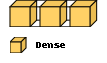

In [11]:
visualkeras.layered_view(modelo,legend=True) 

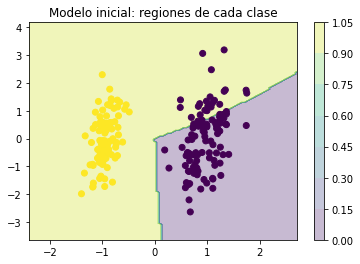

In [12]:
plot_clasificador(modelo,x_train,y_train,title=f"Modelo inicial",detail=0.05)

In [13]:
modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.1), 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy'], 
)

# Entrenamiento del modelo
history = modelo.fit(x_train,y_train,epochs=100,batch_size=8,verbose=False)

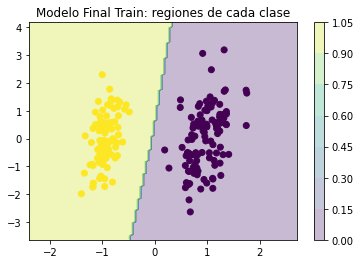

In [14]:
plot_clasificador(modelo,x_train,y_train,title=f"Modelo Final Train",detail=0.05)

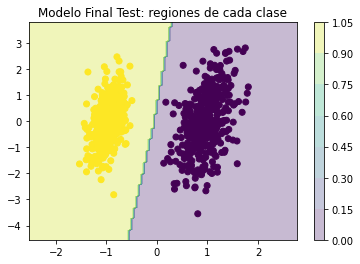

In [16]:
plot_clasificador(modelo,x_test,y_test,title=f"Modelo Final Test",detail=0.05)

# Cálculo de métricas

In [17]:
y_pred = modelo.predict(x_test)

y_pred = np.argmax(y_pred,axis = 1) 

print("  Accuracy : %.2f" % accuracy_score(y_test, y_pred) )
print("  Precision: %.2f" % precision_score(y_test, y_pred) )
print("     Recall: %.2f" % recall_score(y_test, y_pred ))
print("  f-measure: %.2f" % f1_score(y_test, y_pred))

  Accuracy : 1.00
  Precision: 1.00
     Recall: 1.00
  f-measure: 1.00
